In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
poi_x, poi_y = (2,5)
close_dist = 2
far_dist = 6

In [4]:
df = pd.read_csv('data/2025.02.17.13.34.30-experiment.1.localization.accuracy.and.responsiveness.csv', parse_dates=['time'])

In [5]:
df['poi_dist_calc'] = ((df['x']-poi_x)**2 + (df['y']-poi_y)**2)**0.5
df['poi_dist_calc_avg'] = df['poi_dist_calc'].rolling(window=10, center=True).mean()

In [6]:
df.head(5)

,xp_name,xp_step,time,x,y,poi,poi_dist,poi_dist_calc,poi_dist_calc_avg
0,Experiment 1 - Localization Accuracy and Respo...,-1,2025-02-17 13:34:38.382661,7.106536,5.196616,NaN,NaN,5.110320,NaN
1,Experiment 1 - Localization Accuracy and Respo...,-1,2025-02-17 13:34:39.456790,6.645216,5.730807,NaN,NaN,4.702351,NaN
2,Experiment 1 - Localization Accuracy and Respo...,0,2025-02-17 13:34:40.208916,6.645216,5.730807,NaN,NaN,4.702351,NaN
3,Experiment 1 - Localization Accuracy and Respo...,0,2025-02-17 13:34:40.570282,6.838222,5.553909,NaN,NaN,4.869827,NaN
4,Experiment 1 - Localization Accuracy and Respo...,0,2025-02-17 13:34:41.211418,6.838222,5.553909,NaN,NaN,4.869827,NaN


In [7]:
step_times = [
    df[df['xp_step'] == s]['time'].iloc[0]
    for s
    in range(0, max(df['xp_step']+1))
]
step_times

[Timestamp('2025-02-17 13:34:40.208916'),
 Timestamp('2025-02-17 13:35:41.680336'),
 Timestamp('2025-02-17 13:35:49.229106'),
 Timestamp('2025-02-17 13:36:49.696567')]

Text(0.5, 1.0, 'Experiment 1 - Localization Accuracy and Responsiveness')

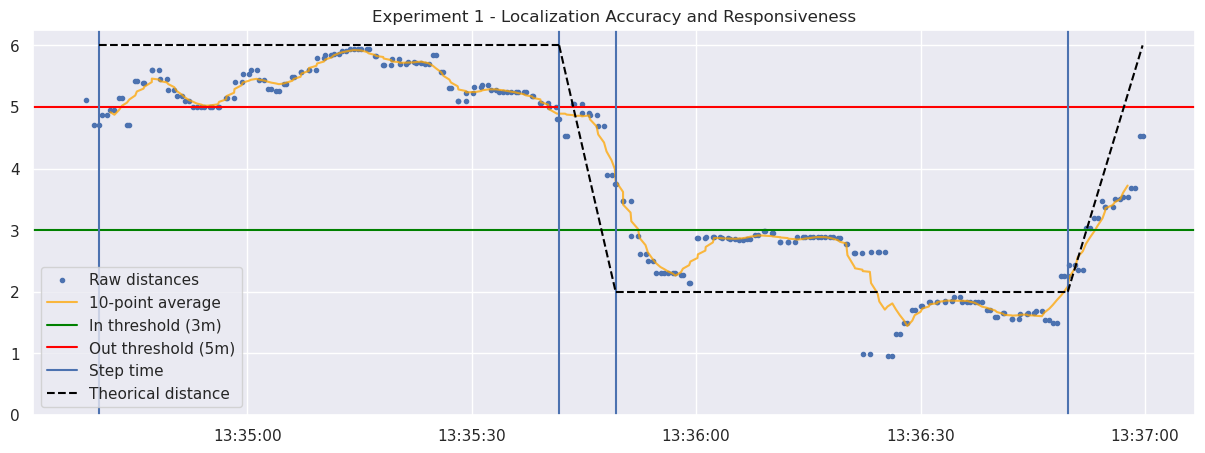

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(df['time'], df['poi_dist_calc'], '.', label='Raw distances')
plt.plot(df['time'], df['poi_dist_calc_avg'], 'orange', alpha=0.75, label='10-point average')
plt.axhline(y=3, color='green', linestyle='-', label='In threshold (3m)')
plt.axhline(y=5, color='red', linestyle='-', label='Out threshold (5m)')

for i, st in enumerate(step_times):
    plt.axvline(x=st, linestyle='-', label='Step time' if i == 0 else None)

plt.plot([step_times[0], step_times[1]], [far_dist, far_dist], 'black', ls='--', label='Theorical distance')
plt.plot([step_times[1], step_times[2]], [far_dist, close_dist], 'black', ls='--')
plt.plot([step_times[2], step_times[3]], [close_dist, close_dist], 'black', ls='--')
plt.plot([step_times[3], max(df['time'])], [close_dist, far_dist], 'black', ls='--') 

plt.ylim(bottom=0)
plt.legend()
plt.title(df.iloc[0]['xp_name'])